In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from minisom import MiniSom
import astropy
from astropy import units as u
from astropy.cosmology import WMAP5
from astropy import units as u

In [2]:
df = pd.read_csv('rcsed.csv')

In [3]:
gasmet = pd.read_csv('rcsed_gasmet.csv')

In [4]:
df

,objid,specobjid,mjd,plate,fiberid,ra,dec,z,zerr,zconf,...,exp_radvel_err,exp_veldisp,exp_veldisp_err,exp_tau,exp_tau_err,exp_met,exp_met_err,exp_chi2,zy_offset,spectrum_snr
0,587722952230174996,96486454284255232,51691,342,261,236.247095,-0.475264,0.030284,0.000076,0.995672,...,12.133666,63.757430,20.861395,20275.2090,-0.00000,-0.637717,0.135672,0.689876,-0.816238,10.953251
1,587722952230175035,96486454292643840,51691,342,263,236.286871,-0.518003,0.077923,0.000047,0.946275,...,17.650702,104.435356,23.671894,14825.9690,6378.93500,-0.632768,0.182408,0.856515,-0.524422,10.035903
2,587722952230175138,96486454296838144,51691,342,264,236.342182,-0.467023,0.160228,0.000131,0.999843,...,12.306463,128.685400,15.314764,3153.4607,212.80362,-0.076188,0.097441,0.600044,-0.426882,9.090064
3,587722952230175145,96486454217146368,51691,342,245,236.350122,-0.598237,0.071558,0.000161,0.999265,...,7.522578,100.722220,10.054415,4777.0723,269.48413,-0.198663,0.071546,0.542412,-0.375608,15.052528
4,587722952230175173,96486454246506496,51691,342,252,236.369360,-0.574450,0.071975,0.000106,0.927581,...,10.842667,119.819880,13.432015,14305.9580,3538.31930,-0.232556,0.101474,0.867223,-0.581393,14.875234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800294,587736619324080484,391758541880295424,52817,1391,474,238.819333,28.174626,0.091174,0.000150,0.999864,...,8.394022,164.722920,9.142451,10.0000,-0.00000,-0.170909,0.053034,0.718107,NaN,15.407777
800295,587736619324145729,391758541901266944,52817,1391,479,238.858952,28.142113,0.150403,0.000154,0.999745,...,17.068280,252.780780,17.399288,10.0000,-0.00000,-0.029017,0.074175,0.594761,NaN,10.943461
800296,587736619324145744,391758541892878336,52817,1391,477,238.962960,28.263509,0.208242,0.000116,0.999406,...,13.059153,197.408100,13.650256,1928.5242,165.19754,0.094809,0.083101,0.608135,NaN,10.303410
800297,587736619324145844,391758541884489728,52817,1391,475,238.880347,28.220378,0.150558,0.000167,0.998861,...,13.087859,223.428450,13.735045,1777.9550,174.27470,-0.029631,0.071375,0.603610,NaN,13.037057


In [47]:
id_col = ['objid','specobjid']
z_col = [  'exp_tau','exp_met','z', 'e_bv', 'ssp_age', 'ssp_met', 'specclass']

band_col = [
    'corrmag_fuv', 'corrmag_nuv', 'corrmag_u', 'corrmag_g', 'corrmag_r', 'corrmag_i', 
    'corrmag_z', 'corrmag_y', 'corrmag_j', 'corrmag_h', 'corrmag_k'
]

kcorr_col = [
     'kcorr_fuv','kcorr_nuv','kcorr_u','kcorr_g','kcorr_r','kcorr_i',
     'kcorr_z','kcorr_y','kcorr_j','kcorr_h','kcorr_k',
]

In [48]:
col = id_col + z_col + band_col + kcorr_col

In [49]:
data = df[col].dropna()

In [50]:
data[band_col].head()

,corrmag_fuv,corrmag_nuv,corrmag_u,corrmag_g,corrmag_r,corrmag_i,corrmag_z,corrmag_y,corrmag_j,corrmag_h,corrmag_k
18,20.430805,20.963827,19.483593,18.175556,17.582560,17.170374,16.867794,16.277828,16.224766,15.796741,15.897239
20,20.316390,19.689003,18.913360,17.633633,17.118832,16.801023,16.559082,16.183378,16.157516,16.061178,15.977037
25,20.786072,19.694458,18.216558,16.744936,15.942631,15.533159,15.280964,14.804124,14.598612,14.280346,14.365913
28,20.476007,19.936340,18.627714,17.455538,16.852865,16.501130,16.458048,15.947557,15.661368,15.418820,15.581812
29,19.992838,19.668417,18.950533,17.954803,17.538660,17.193727,17.054646,16.804903,16.682253,16.268763,16.288889


In [51]:
DL = astropy.cosmology.Planck18.luminosity_distance(data['z']).values
DL = DL.value

In [52]:
# k correlation 
DL = astropy.cosmology.Planck18.luminosity_distance(data['z']).values
DL = DL.value
kcorrmag = []
for i,j in zip(band_col, kcorr_col):
    data['kcorr'+i] = data[i].values - 5 * np.log10(DL) - 25 - data[j].values
    kcorrmag.append('kcorr'+i)

In [53]:
data[kcorrmag].head()

,kcorrcorrmag_fuv,kcorrcorrmag_nuv,kcorrcorrmag_u,kcorrcorrmag_g,kcorrcorrmag_r,kcorrcorrmag_i,kcorrcorrmag_z,kcorrcorrmag_y,kcorrcorrmag_j,kcorrcorrmag_h,kcorrcorrmag_k
18,-17.336856,-16.871063,-18.472444,-19.732151,-20.274291,-20.648209,-20.965027,-21.583594,-21.552286,-22.025731,-21.749908
20,-17.481505,-18.111204,-19.029711,-20.241857,-20.728210,-20.981151,-21.255622,-21.534054,-21.621299,-21.744257,-21.675616
25,-17.551703,-18.633691,-20.271134,-21.741472,-22.418804,-22.789307,-23.023073,-23.549892,-23.646537,-24.021527,-23.732957
28,-17.337651,-17.868070,-19.302804,-20.443275,-20.992583,-21.295717,-21.323250,-21.906601,-22.103648,-22.388740,-22.060079
29,-18.653983,-18.982750,-19.781546,-20.747881,-21.143956,-21.393290,-21.608069,-21.956285,-21.938646,-22.424797,-22.162743


In [54]:
exp_tau = data['exp_tau'].values
exp_met = data['exp_met'].values
inputs = data[kcorrmag]
inputs = np.array(inputs)

In [37]:
# Initialization and training
n_neurons = 80
m_neurons = 80
som = MiniSom(n_neurons, m_neurons, 11, neighborhood_function='gaussian',learning_rate=0.1,
             sigma = 3
             )

som.pca_weights_init(inputs)
som.train(inputs, 100000, verbose=True) 

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.4651495873283442


In [38]:
X = []
Y = []
for xx in inputs:
    x,y = som.winner(xx)
    X.append(x)
    Y.append(y)

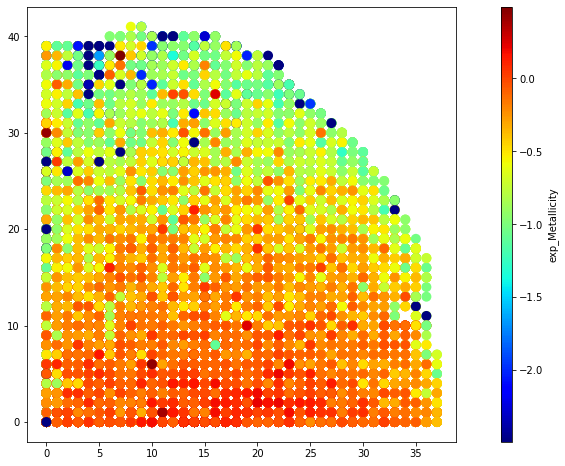

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c = exp_met, cmap=plt.cm.jet, edgecolor='none', s=100)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label = 'exp_Metallicity')
plt.savefig('exp_met')
plt.show()

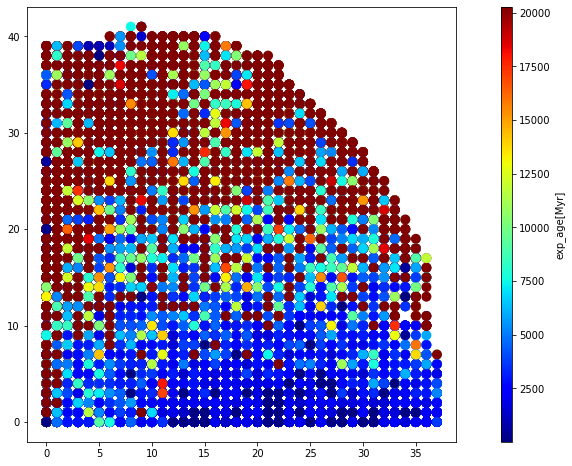

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c = exp_tau, cmap=plt.cm.jet, edgecolor='none', s=100)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label='exp_age[Myr]')
plt.savefig('exp_age')
plt.show()

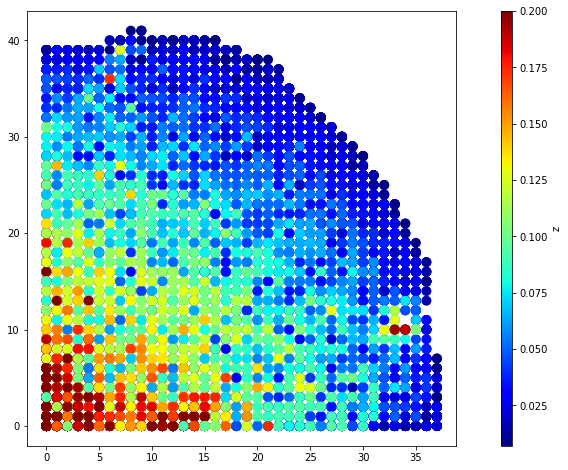

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c = data['z'].values, cmap=plt.cm.jet, edgecolor='none', s=100,vmax=0.2 )
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label='z')
plt.savefig('z')
plt.show()

In [46]:
data

,objid,specobjid,exp_tau,exp_met,z,corrmag_fuv,corrmag_nuv,corrmag_u,corrmag_g,corrmag_r,...,kcorrcorrmag_nuv,kcorrcorrmag_u,kcorrcorrmag_g,kcorrcorrmag_r,kcorrcorrmag_i,kcorrcorrmag_z,kcorrcorrmag_y,kcorrcorrmag_j,kcorrcorrmag_h,kcorrcorrmag_k
18,587722952230633809,96486453437005824,20275.2090,-0.420272,0.077949,20.430805,20.963827,19.483593,18.175556,17.582560,...,-16.871063,-18.472444,-19.732151,-20.274291,-20.648209,-20.965027,-21.583594,-21.552286,-22.025731,-21.749908
20,587722952230633896,96486453416034304,8050.5273,-0.198619,0.077890,20.316390,19.689003,18.913360,17.633633,17.118832,...,-18.111204,-19.029711,-20.241857,-20.728210,-20.981151,-21.255622,-21.534054,-21.621299,-21.744257,-21.675616
25,587722952230699523,96486453483143168,2054.7795,0.067616,0.095983,20.786072,19.694458,18.216558,16.744936,15.942631,...,-18.633691,-20.271134,-21.741472,-22.418804,-22.789307,-23.023073,-23.549892,-23.646537,-24.021527,-23.732957
28,587722952230764965,96486453428617216,14524.0010,-0.268555,0.077523,20.476007,19.936340,18.627714,17.455538,16.852865,...,-17.868070,-19.302804,-20.443275,-20.992583,-21.295717,-21.323250,-21.906601,-22.103648,-22.388740,-22.060079
29,587722952230765124,96486453214707712,20275.2090,-0.233757,0.113898,19.992838,19.668417,18.950533,17.954803,17.538660,...,-18.982750,-19.781546,-20.747881,-21.143956,-21.393290,-21.608069,-21.956285,-21.938646,-22.424797,-22.162743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800201,587736619324997903,392040036830281728,20275.2090,-0.880943,0.089547,19.809160,19.113916,18.854984,18.010595,17.712389,...,-19.009181,-19.341500,-20.115486,-20.430726,-20.504261,-20.682233,-21.114114,-21.297772,-21.391866,-21.068398
800203,587736619324997970,392040036809310208,2535.8170,-0.133754,0.226609,20.399752,20.605766,19.963165,19.274206,18.505648,...,-19.625757,-20.442350,-21.266793,-21.783540,-22.202436,-22.610691,-23.162966,-23.429302,-23.520439,-23.355376
800207,587736619325129065,392321521508417536,20275.2090,-1.074763,0.089054,20.564010,19.586855,19.014215,17.972890,17.561459,...,-18.510454,-19.191542,-20.169860,-20.576136,-20.890183,-20.970274,-21.472794,-21.634236,-21.834196,-21.636447
800208,587736619325129070,392321521521000448,4722.5776,-0.037938,0.049295,20.287233,19.436380,18.945206,17.997948,17.582090,...,-17.342865,-17.953103,-18.803508,-19.227469,-19.301542,-19.093981,-19.437608,-19.221145,-19.687457,-18.764629


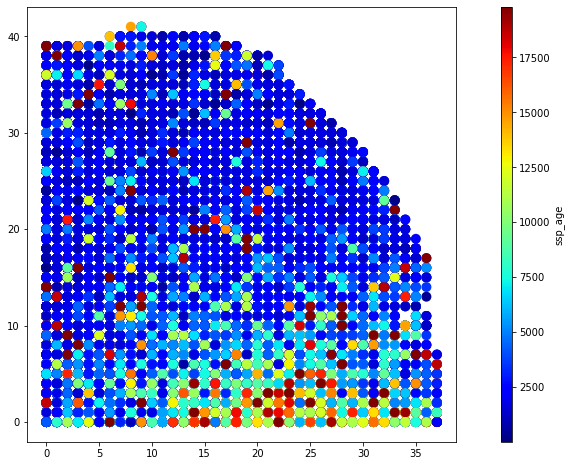

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c = data['ssp_age'].values, cmap=plt.cm.jet, edgecolor='none', s=100)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label='ssp_age')
plt.savefig('ssp_age_kcorr_som')
plt.show()

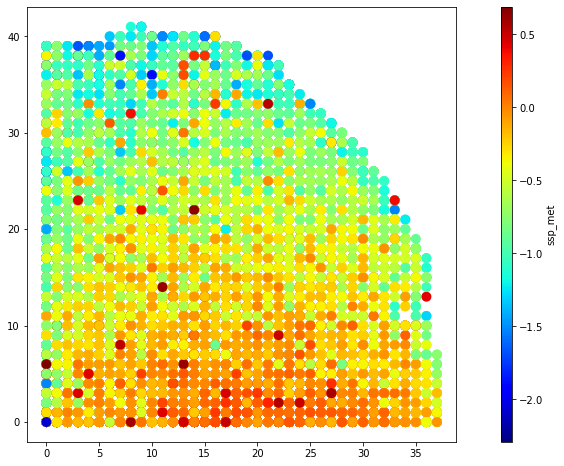

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, c = data['ssp_met'].values, cmap=plt.cm.jet, edgecolor='none', s=100)
plt.colorbar(aspect=40, pad=0.08, orientation='vertical', label='ssp_met')
plt.savefig('ssp_met_kcorr_som')
plt.show()